#  Project 2: Netflix Content Analysis (EDA)

###  Objective
Perform an in-depth exploratory data analysis on the Netflix dataset to uncover trends in content production, popular genres, ratings distribution, and the balance between movies and TV shows. This project extends basic EDA with time-based insights and advanced data preprocessing.

###  Key Concepts Covered
- **Data Cleaning & Transformation:** Handling missing values and date conversions  
- **Time-Series Analysis:** Trends in content additions over the years  
- **Text Data Analysis:** Exploring genres and cast information  
- **Geographical & Rating Insights:** Content origin and maturity levels  
- **Feature Engineering:** Creating features like *content age*  
- **Advanced Visualizations:** Meaningful plots to reveal patterns  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

### Step 1: Data Loading and Initial Inspection

We'll load the `netflix_titles.csv` dataset

In [2]:
!pip install pandas

In [3]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 335 (delta 22), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (335/335), 302.68 MiB | 21.80 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Updating files: 100% (243/243), done.


In [4]:
df = pd.read_csv('/content/Datasets/Netflix_Titles Dataset/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
df['type'].value_counts()

,count
type,
Movie,5377
TV Show,2410


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


###  Interpretation  

- The dataset contains **7,787 titles**.
- **Key Issue:** `date_added` is stored as an `object` (string) instead of `datetime`, which must be fixed for time-based analysis.
- **Missing Values:** Columns with null values include `director`, `cast`, `country`, `date_added`, and `rating`.
- **Most Affected Column:** `director` has the highest number of missing entries.


### Step 2: Data Cleaning and Transformation

We will handle missing values and correct data types.

###  Theoretical Concept: Data Type Conversion & Handling Nulls

- **Data Type Conversion:** Dates stored as strings limit analysis. Converting columns to proper types (e.g., `pd.to_datetime`, `.astype()`) enables time-based insights and accurate plotting.
- **Handling Null Values:** Common strategies include:
  - **Drop:** Remove rows with missing values when they are few (`.dropna()`).
  - **Fill/Impute:** Replace missing values with placeholders (e.g., *"Unknown"*) or statistical measures like the mode to retain data.


In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [11]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [12]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,507
date_added,10
release_year,0
rating,7
duration,0


In [10]:
df['country'].value_counts()

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


In [13]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [14]:
df.dropna(subset=['date_added','rating'], inplace=True)

In [15]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [17]:
df['date_added']

,date_added
0,2020-08-14
1,2016-12-23
2,2018-12-20
3,2017-11-16
4,2020-01-01
...,...
7782,2020-10-19
7783,2019-03-02
7784,2020-09-25
7785,2020-10-31


In [16]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False)

In [18]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [19]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


### Step 3: Exploratory Data Analysis & Visualization

#### 3.1 What is the distribution of content type?

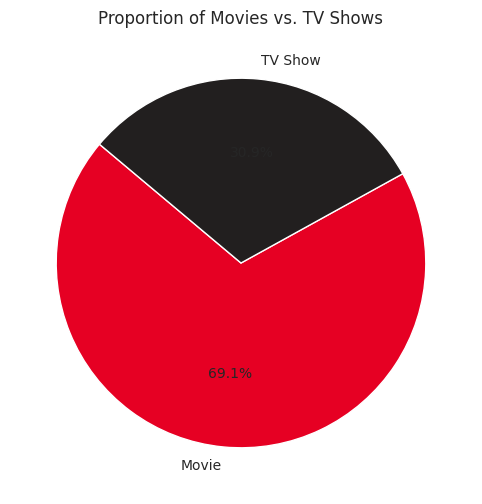

In [20]:
plt.figure(figsize=(8,6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

#### 3.2 How has content been added over time?

<Figure size 1200x800 with 0 Axes>

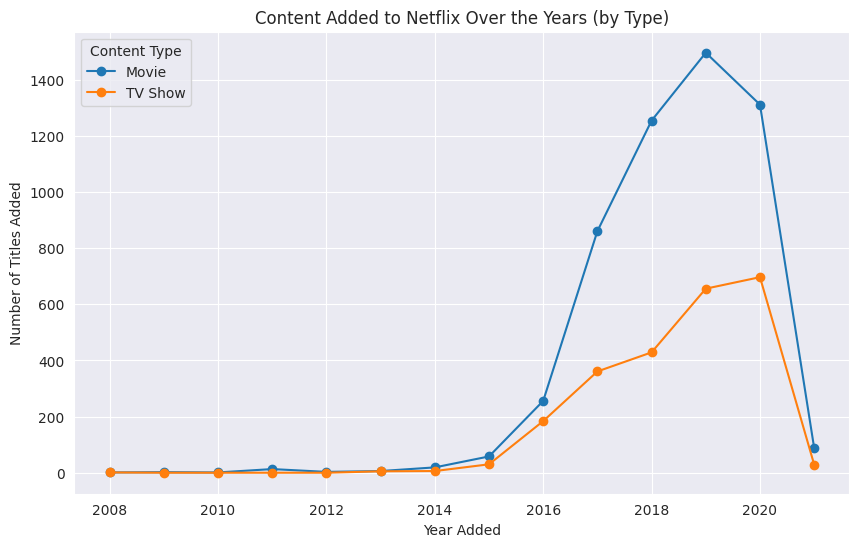

In [21]:
content_over_year = df.groupby(['year_added','type']).size().unstack().fillna(0)

plt.figure(figsize=(12,8))
content_over_year.plot(kind='line', marker = 'o', figsize=(10,6))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

**Insight:** Separating movies and TV shows shows that both grew over time, but **movies increased much more rapidly**, peaking in **2019**, while **TV shows grew steadily**. A slight slowdown in **2020–2021** is visible, possibly due to **COVID-19 disruptions** or incomplete recent data.


#### 3.3 What are the most popular genres?

In [22]:
df['listed_in']

,listed_in
0,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,"Dramas, International Movies"
2,"Horror Movies, International Movies"
3,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Dramas
...,...
7782,"Dramas, International Movies"
7783,"Dramas, International Movies, Music & Musicals"
7784,"Documentaries, International Movies, Music & M..."
7785,"International TV Shows, Reality TV"


####  Theoretical Concept: Handling Multi-Value Text Columns

The `listed_in` column contains multiple genres in a single string. To analyze genres individually:
1. **Split** the genre string into a list.
2. **Explode** the DataFrame so each genre gets its own row.

This transformation allows accurate genre analysis using `value_counts()`.


In [23]:
genres = df.assign(genre = df['listed_in'].str.split(', ')).explode('genre')

In [24]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [25]:
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['Genre','Counts']

In [26]:
top_genres_counts_plot = top_genres_counts.head(15)

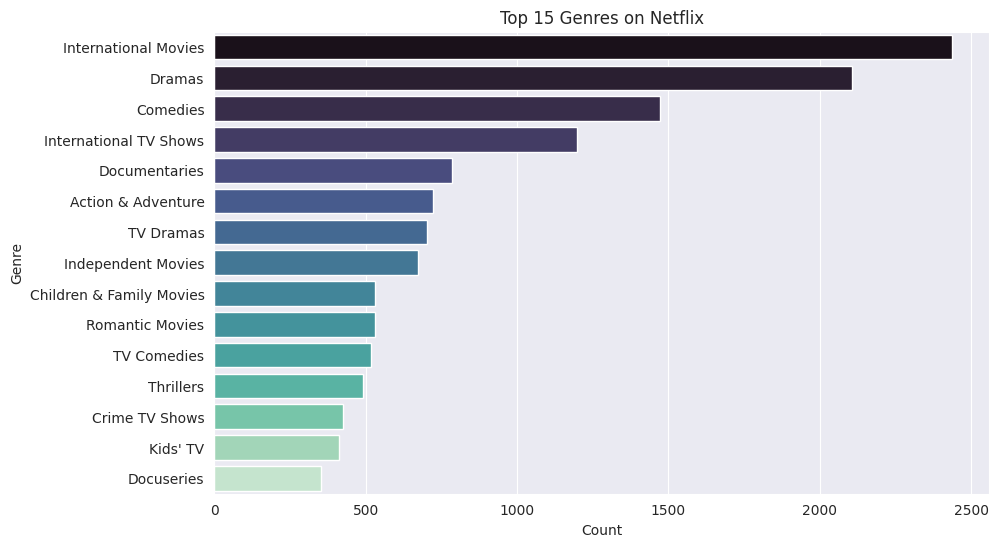

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Genre', x='Counts', data=top_genres_counts_plot, palette='mako', hue='Genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

#### 3.4 What is the distribution of content duration?

In [28]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [29]:
movies_df = df[df['type']=='Movie'].copy()
tv_shows_df = df[df['type']=='TV Show'].copy()

In [30]:
movies_df['duration_min'] = movies_df['duration'].str.replace(' min','').astype(int)

In [31]:
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons','').str.replace(' Season','').astype(int)

In [33]:
tv_shows_df['seasons'].value_counts().index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 12, 13, 16], dtype='int64', name='seasons')

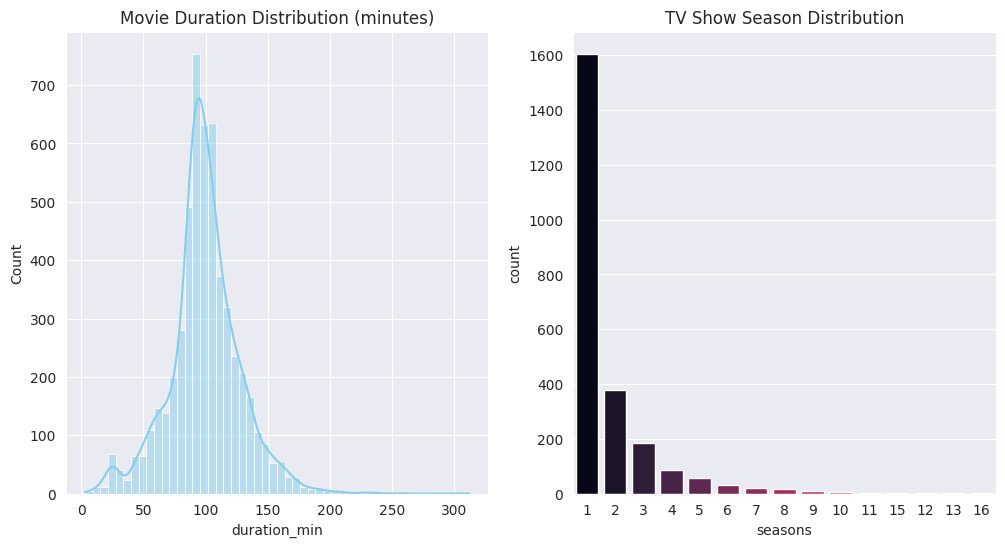

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

**Insight:**
- Most Netflix movies run between **80–120 minutes**, typical for feature films.
- Most TV shows have **only 1 season**, suggesting a focus on limited series or selective renewals.


#### 3.5 Where does the content come from? (Geographical Analysis)

In [35]:
df['country']

,country
0,Brazil
1,Mexico
2,Singapore
3,United States
4,United States
...,...
7782,"Sweden, Czech Republic, United Kingdom, Denmar..."
7783,India
7784,United States
7785,Australia


In [36]:
countries = df.assign(country=df['country'].str.split(', ')).explode('country')

In [37]:
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count']

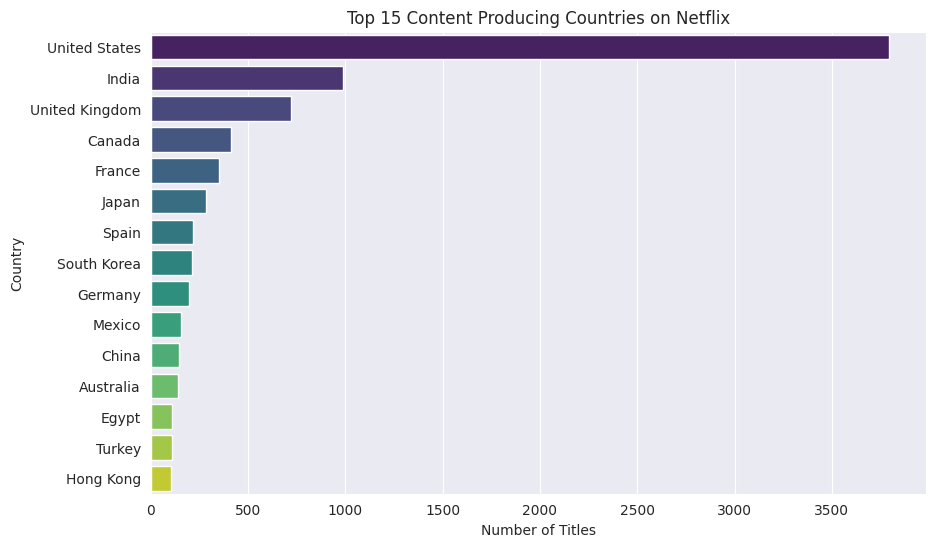

In [38]:
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Insight:** The **United States** is the largest content producer on Netflix, followed strongly by **India**, explaining the high presence of Indian actors. **UK, Japan, and South Korea** are also major contributors, highlighting Netflix’s global reach.


#### 3.6 What are the maturity ratings of the content?

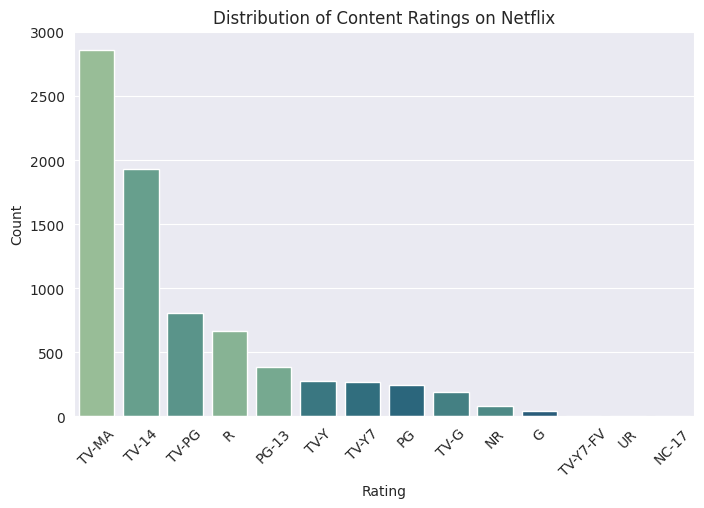

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Insight:** Most Netflix content targets **mature audiences**, with `TV-MA` and `TV-14` being the most common ratings, indicating a stronger focus on adult viewers than children’s content.


### Step 4: Feature Engineering - Content Freshness
Let's create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

In [40]:
df['age_on_netflix'] = df['year_added'] - df['release_year']

In [41]:
content_age = df[df['age_on_netflix'] >= 0]

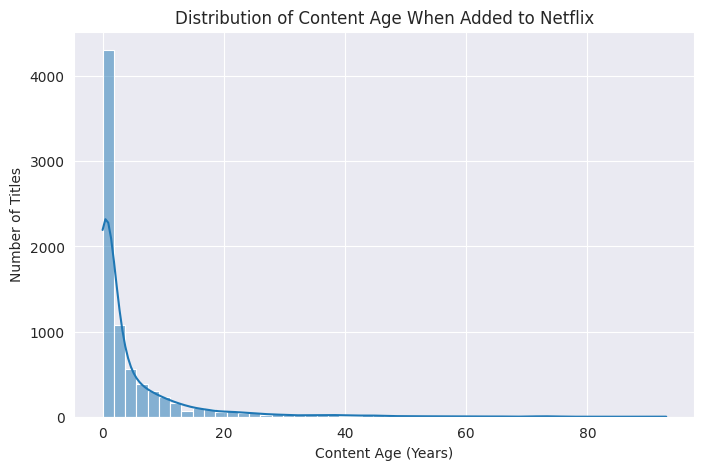

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

**Insight:** The spike at **0 years** shows much content is added the same year it’s released, typical of **Netflix Originals**. The long tail indicates strong investment in **older, licensed content**, creating a rich library of classics.


### Step 5: Deeper Multivariate Analysis

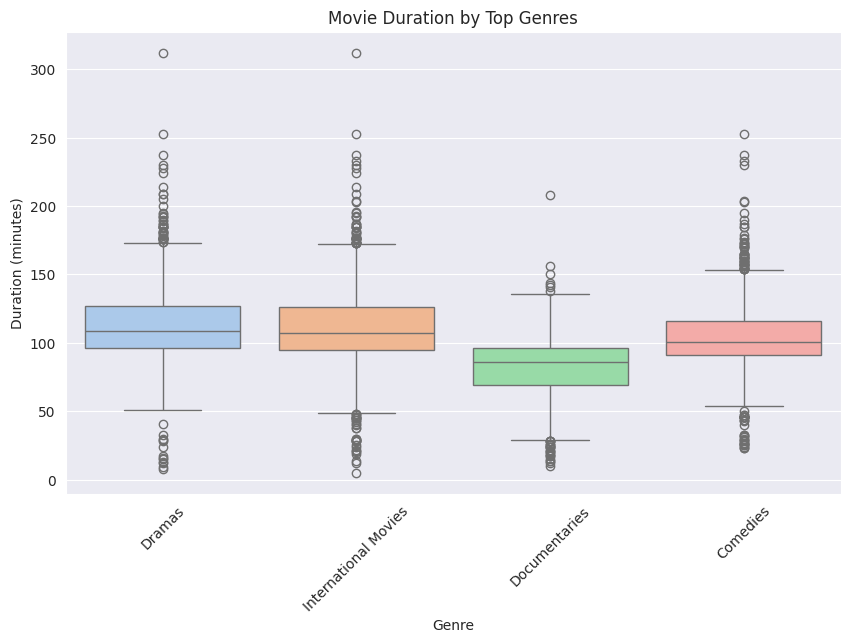

In [43]:
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10, 6))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

### Step 6: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the `description` column to see what themes and words are most common in Netflix content.

In [44]:
text = ' '.join(df['description'])

In [45]:
text

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that\'s haunting their jungle island training camp. In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group. A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack. A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect. After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before 

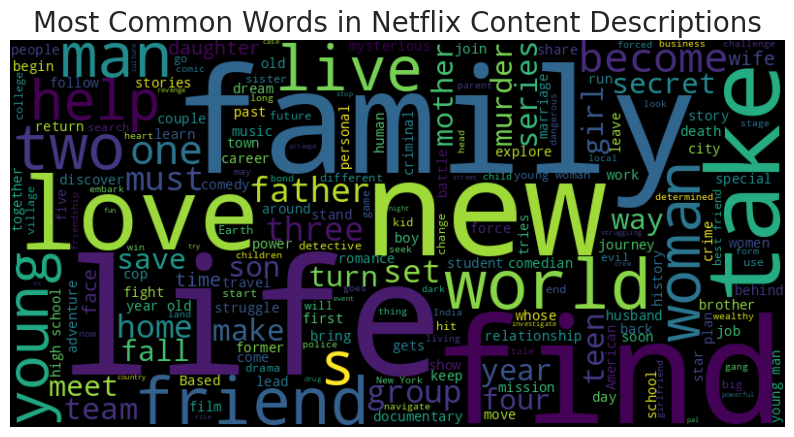

In [46]:
wordcloud = WordCloud(width=800,height=400,background_color='black').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

**Insight:** The word cloud shows dominant themes around **human relationships and personal journeys**, with frequent words like *life, family, love, young,* and *friends*. Action-driven terms such as *find, secret,* and *new* also appear often.


###  Final Conclusion & Summary

This EDA reveals key patterns in Netflix’s content strategy and library composition.

**Key Insights:**
- **Content Strategy:** Netflix is movie-heavy (~70%) with rapid content growth from 2016–2019, combining Originals and licensed classics.
- **Global Reach:** The US leads content production, with **India** as a strong second, highlighting Netflix’s international focus.
- **Target Audience:** Most content is aimed at **mature audiences** (`TV-MA`, `TV-14`).
- **Formats & Genres:** **Dramas and Comedies** dominate. Movies typically run **90–120 minutes**, while most TV shows have **1 season**.
- **Themes:** Common themes include **life, family, love, and discovery**.

**Limitation:** The dataset lacks viewership data, so insights reflect content availability, not audience demand.


# Homework

## Submission Q's

* How has the distribution of content ratings changed over time?
* Is there a relationship between content age and its type (Movie vs. TV Show)?
* Can we identify any trends in content production based on the release year vs. the year added to Netflix?
* What are the most common word pairs or phrases in content descriptions?
* Who are the top directors on Netflix?

* How has the distribution of content ratings changed over time?

In [49]:
ratings_over_time = (
    df
    .groupby(['year_added', 'rating'])
    .size()
    .unstack()
    .fillna(0)
)

ratings_over_time.head()


rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
year_added,,,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<Figure size 1400x800 with 0 Axes>

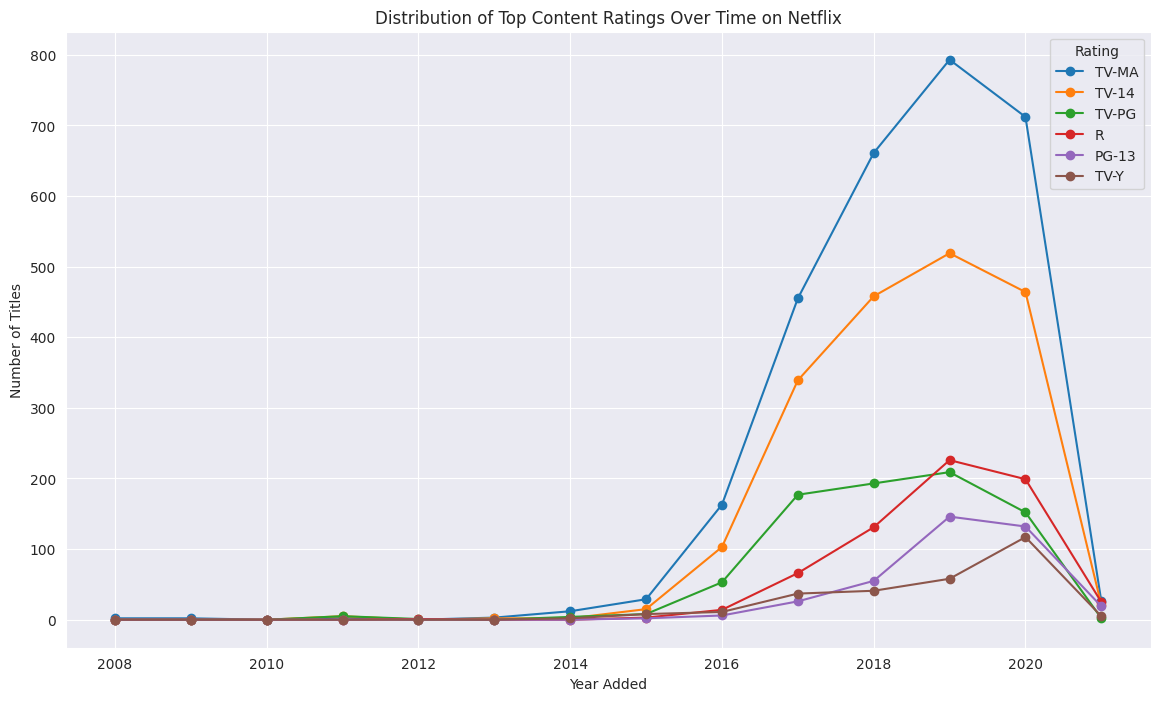

In [50]:

top_ratings = df['rating'].value_counts().head(6).index

ratings_top = ratings_over_time[top_ratings]

plt.figure(figsize=(14, 8))
ratings_top.plot(figsize=(14, 8), marker='o')
plt.title('Distribution of Top Content Ratings Over Time on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating')
plt.grid(True)
plt.show()


**Insight:** The visualization shows a clear shift toward mature-rated content over time. From 2015 onward, ratings such as `TV-MA` and `TV-14` increase sharply and dominate Netflix’s content additions, peaking around 2019. Family-friendly ratings grow more slowly and remain a smaller portion of the catalog. The decline seen in 2021 is likely due to incomplete data rather than an actual reduction in content production.


* Is there a relationship between content age and its type (Movie vs. TV Show)?

In [51]:
# Ensure valid content age (added year >= release year)
content_age_type = df[df['age_on_netflix'] >= 0].copy()

content_age_type[['type', 'age_on_netflix']].head()


,type,age_on_netflix
0,TV Show,0
1,Movie,0
2,Movie,7
3,Movie,8
4,Movie,12


/tmp/ipython-input-498157516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


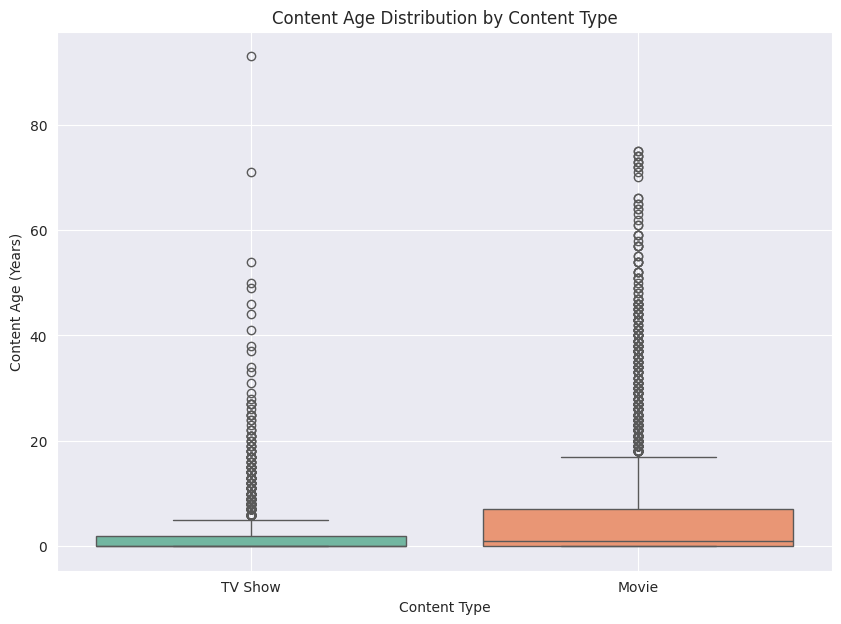

In [52]:
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=content_age_type,
    x='type',
    y='age_on_netflix',
    palette='Set2'
)

plt.title('Content Age Distribution by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Content Age (Years)')
plt.grid(True)
plt.show()


**Insight:** The boxplot reveals a clear relationship between content age and content type. TV shows are generally much newer when added to Netflix, with most being released and added in the same year. In contrast, movies show a wider age distribution and are often significantly older, indicating Netflix’s strong reliance on licensing classic films alongside releasing new originals.


* Can we identify any trends in content production based on the release year vs. the year added to Netflix?

In [53]:
release_vs_added = df[['release_year', 'year_added', 'type']].dropna()

release_vs_added.head()


,release_year,year_added,type
0,2020,2020,TV Show
1,2016,2016,Movie
2,2011,2018,Movie
3,2009,2017,Movie
4,2008,2020,Movie


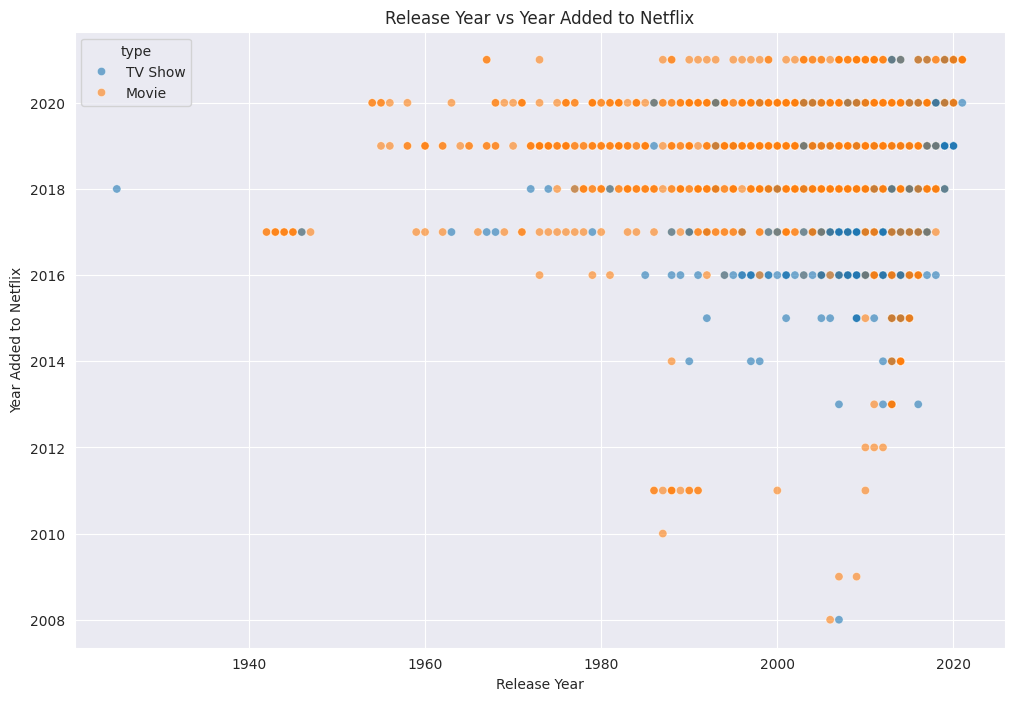

In [54]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=release_vs_added,
    x='release_year',
    y='year_added',
    hue='type',
    alpha=0.6
)

plt.title('Release Year vs Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.grid(True)
plt.show()


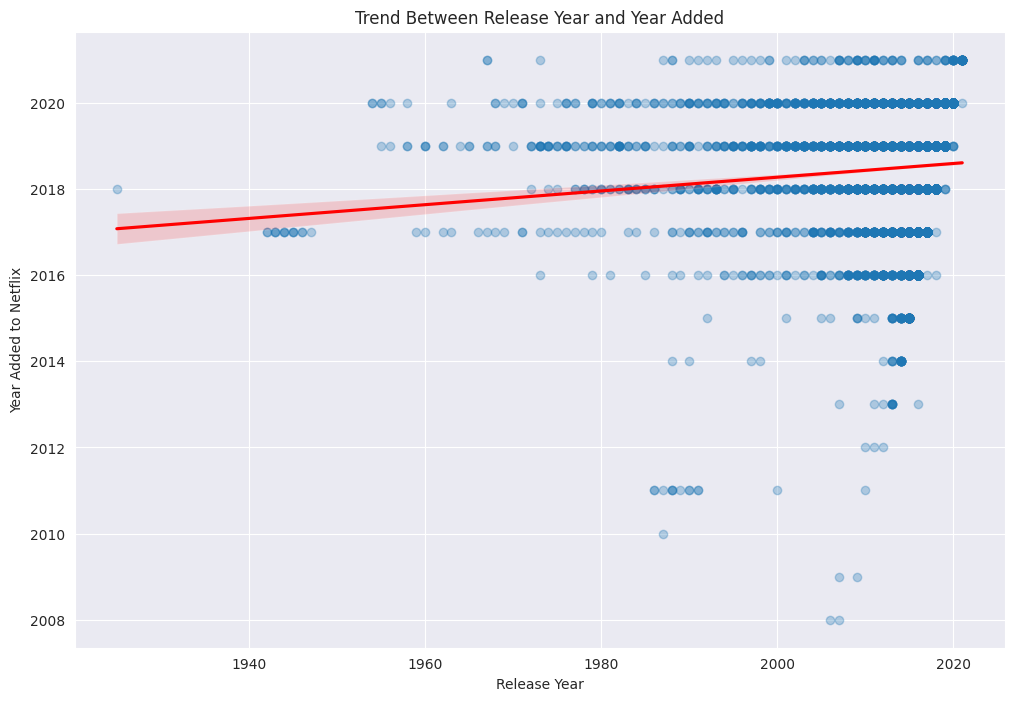

In [55]:
plt.figure(figsize=(12, 8))

sns.regplot(
    data=release_vs_added,
    x='release_year',
    y='year_added',
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)

plt.title('Trend Between Release Year and Year Added')
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.grid(True)
plt.show()


**Insight:** The analysis reveals a clear trend where newer content is added to Netflix closer to its release year, as shown by the strong positive correlation between release year and year added. A dense clustering along the diagonal highlights the rise of Netflix Originals and rapid acquisitions in recent years. At the same time, the presence of older


* What are the most common word pairs or phrases in content descriptions?

In [56]:
import re
from collections import Counter

def simple_clean(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

words_list = df['description'].dropna().apply(simple_clean)


In [57]:
bigrams = []

for words in words_list:
    for i in range(len(words) - 1):
        bigrams.append(words[i] + ' ' + words[i+1])

# Count frequency
bigram_counts = Counter(bigrams)

# Convert to DataFrame
bigram_df = pd.DataFrame(
    bigram_counts.most_common(15),
    columns=['word_pair', 'count']
)

bigram_df


,word_pair,count
0,in a,646
1,in this,615
2,in the,606
3,of the,582
4,of a,494
5,with a,410
6,on a,390
7,a young,369
8,when a,350
9,to the,339


/tmp/ipython-input-2443126922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


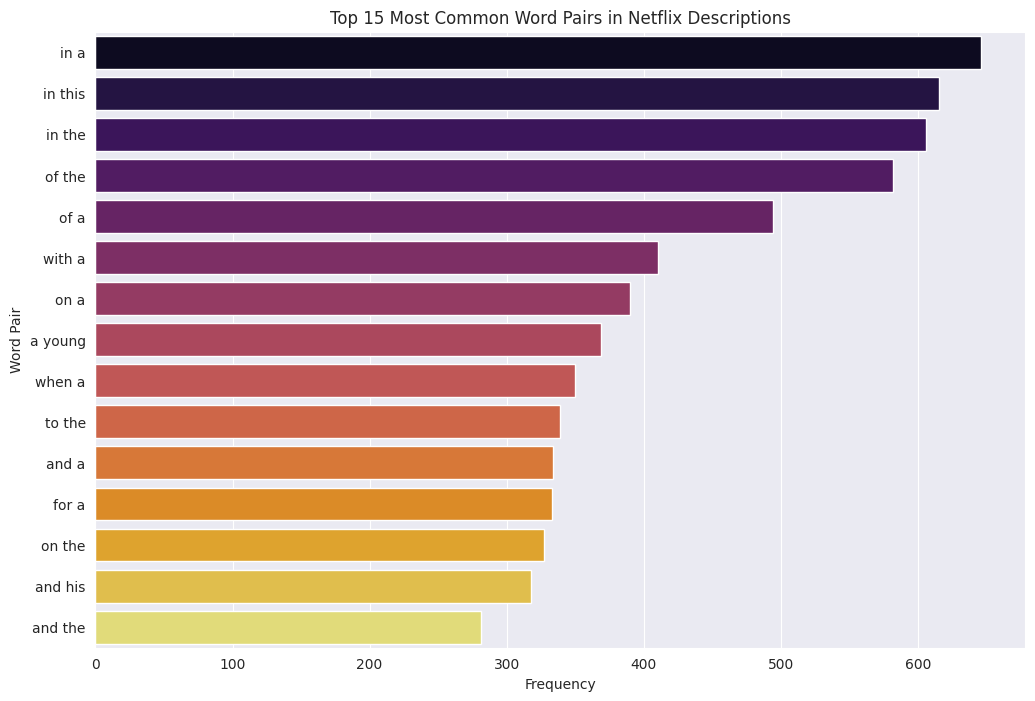

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=bigram_df,
    x='count',
    y='word_pair',
    palette='inferno'
)

plt.title('Top 15 Most Common Word Pairs in Netflix Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word Pair')
plt.show()


**Insight:** The most common word pairs are dominated by grammatical phrases such as *“in a”*, *“of the”*, and *“and a”*. This indicates that while the simple bigram approach captures frequent word combinations, it also highlights the limitation of not removing stopwords. Despite this, some meaningful phrases such as *“a young”* and *“when a”* still appear, hinting at recurring narrative patterns involving youth and personal events.


* Who are the top directors on Netflix?

In [59]:
directors = (
    df
    .assign(director=df['director'].str.split(', '))
    .explode('director')
)

directors.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12


In [60]:
top_directors = (
    directors['director']
    .value_counts()
    .head(10)
    .reset_index()
)

top_directors.columns = ['director', 'count']
top_directors


,director,count
0,Unknown,2376
1,Jan Suter,21
2,Raúl Campos,19
3,Marcus Raboy,16
4,Jay Karas,15
5,Cathy Garcia-Molina,13
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Jay Chapman,12
9,Steven Spielberg,10


/tmp/ipython-input-4220669124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


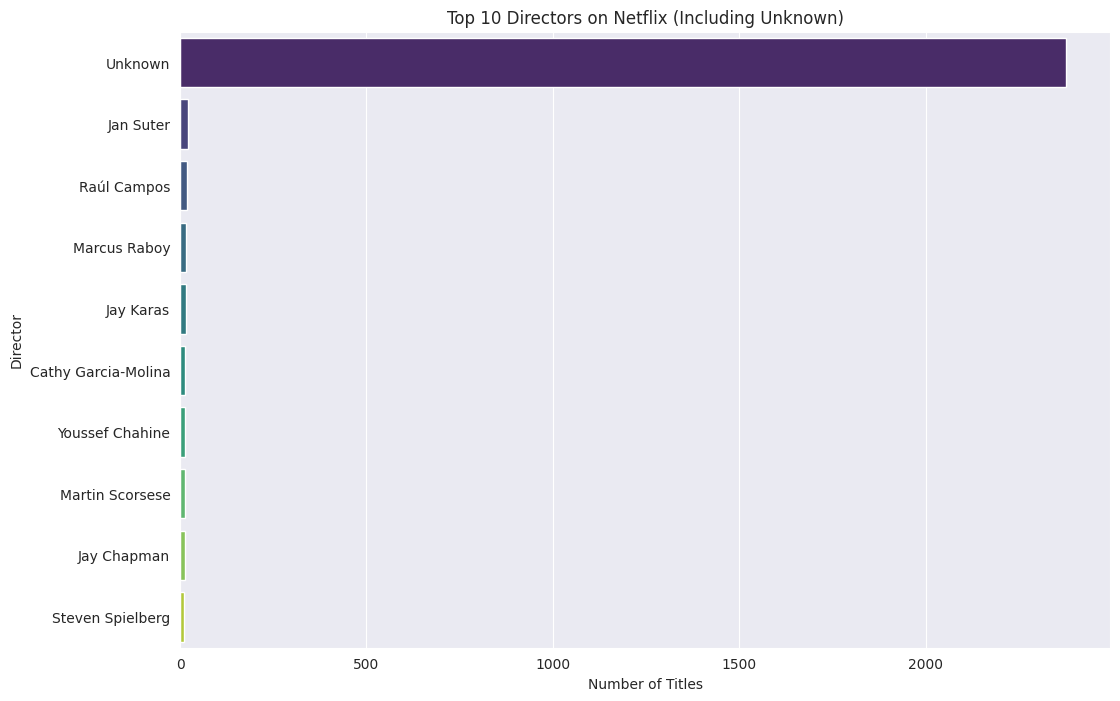

In [61]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_directors,
    x='count',
    y='director',
    palette='viridis'
)

plt.title('Top 10 Directors on Netflix (Including Unknown)')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


**Insight:** The `Unknown` category dominates the director distribution, indicating a large amount of missing metadata rather than a real production trend. If we ignore the `Unknown` entries, the most frequent directors on Netflix include **Jan Suter**, **Raúl Campos**, **Marcus Raboy**, and **Jay Karas**, many of whom are known for directing stand-up specials and high-volume content. This suggests that Netflix repeatedly collaborates with a small group of prolific directors to scale its content library efficiently.
